In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\91998\\Python_Crash_Course_Udemy_Jose\\Customer_Retention_Project'

In [3]:
Cust_df = pd.read_excel("Customer Retention Case Study Data.xlsx",sheet_name='Data')

In [60]:
Cust_df.shape

(54030, 12)

In [4]:
Cust_df.head()

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21,79070.91,Individuals,0,I,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,I,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,I,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,I,0,1,0,1440
4,M,31,112975.17,Individuals,0,I,0,0,0,376


In [5]:
Cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54030 entries, 0 to 54029
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 54030 non-null  object 
 1   age                    54030 non-null  int64  
 2   gross_income           54030 non-null  float64
 3   segment                54030 non-null  object 
 4   num_credit_cards       54030 non-null  int64  
 5   active_inactive_start  54030 non-null  object 
 6   active_inactive_end    54030 non-null  int64  
 7   num_products           54030 non-null  int64  
 8   num_loans              54030 non-null  int64  
 9   duration               54030 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 4.1+ MB


In [6]:
Cust_df.dtypes

gender                    object
age                        int64
gross_income             float64
segment                   object
num_credit_cards           int64
active_inactive_start     object
active_inactive_end        int64
num_products               int64
num_loans                  int64
duration                   int64
dtype: object

In [7]:
Cust_df.corr()

,age,gross_income,num_credit_cards,active_inactive_end,num_products,num_loans,duration
age,1.000000,0.068409,0.095849,0.137996,0.178127,0.042707,0.600794
gross_income,0.068409,1.000000,0.020331,0.024648,0.035752,0.002298,0.078364
num_credit_cards,0.095849,0.020331,1.000000,0.241038,0.553429,0.112771,0.188046
active_inactive_end,0.137996,0.024648,0.241038,1.000000,0.547261,0.093816,0.151878
num_products,0.178127,0.035752,0.553429,0.547261,1.000000,0.207848,0.315258
num_loans,0.042707,0.002298,0.112771,0.093816,0.207848,1.000000,0.100870
duration,0.600794,0.078364,0.188046,0.151878,0.315258,0.100870,1.000000


<AxesSubplot:>

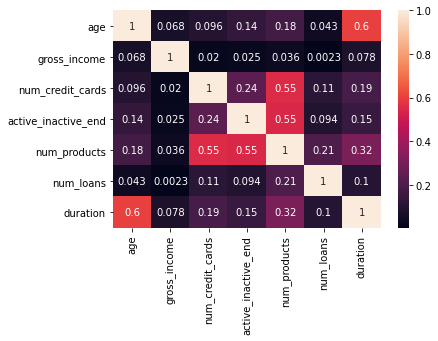

In [8]:
sns.heatmap(Cust_df.corr(),annot = True)

In [9]:
Cust_df.isnull().sum()

gender                   0
age                      0
gross_income             0
segment                  0
num_credit_cards         0
active_inactive_start    0
active_inactive_end      0
num_products             0
num_loans                0
duration                 0
dtype: int64

In [10]:
Cust_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,54030.0,40.772534,17.210781,2.00,25.0000,40.00,51.000,112.00
gross_income,54030.0,134196.672404,239721.455090,2336.01,68581.0725,101566.32,156253.755,28894395.51
num_credit_cards,54030.0,0.049880,0.217698,0.00,0.0000,0.00,0.000,1.00
active_inactive_end,54030.0,0.469073,0.499047,0.00,0.0000,0.00,1.000,1.00
num_products,54030.0,1.536017,1.578848,0.00,1.0000,1.00,2.000,13.00
num_loans,54030.0,0.009365,0.096320,0.00,0.0000,0.00,0.000,1.00
duration,54030.0,2913.936665,2027.956268,366.00,1118.0000,2039.50,4693.000,7909.00


In [11]:
bool_series = pd.isnull(Cust_df["gender"])
Cust_df[(bool_series)]

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration


In [12]:
bool_series = pd.isnull(Cust_df["segment"])
Cust_df[(bool_series)]

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration


In [13]:
Cust_df['gender'].nunique()

2

In [14]:
Cust_df['segment'].nunique()

3

In [15]:
Cust_df['gender'].value_counts()

F    29681
M    24349
Name: gender, dtype: int64

In [16]:
Cust_df['segment'].value_counts()

Individuals          32607
College_Graduated    18963
VIP                   2460
Name: segment, dtype: int64

In [17]:
#df.replace({False: 0, True: 1}, inplace=True)
#df['type'] = df['type'].map({'REAL': 1, 'FAKE': 0})
Cust_df['active_inactive_start'] = Cust_df['active_inactive_start'].map({'I':0,'A':1})

In [18]:
Cust_df.head(10)

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration
0,M,21,79070.91,Individuals,0,0,0,1,0,1035
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440
4,M,31,112975.17,Individuals,0,0,0,0,0,376
5,F,32,37318.56,Individuals,0,1,1,4,0,699
6,F,43,131281.50,Individuals,0,1,0,1,0,5022
7,M,48,184641.60,Individuals,0,1,1,1,0,4066
8,F,36,164347.86,VIP,0,1,1,1,0,1427
9,M,26,27311.31,College_Graduated,0,0,1,1,0,1458


In [19]:
Cust_df.dtypes

gender                    object
age                        int64
gross_income             float64
segment                   object
num_credit_cards           int64
active_inactive_start      int64
active_inactive_end        int64
num_products               int64
num_loans                  int64
duration                   int64
dtype: object

In [20]:
Cust_df.duplicated().sum()

1191

In [21]:
Cust_df.isnull().sum()

gender                   0
age                      0
gross_income             0
segment                  0
num_credit_cards         0
active_inactive_start    0
active_inactive_end      0
num_products             0
num_loans                0
duration                 0
dtype: int64

# Data Exploration and Business Hypothesis Testing

In [23]:
Cust_df.loc[(Cust_df.active_inactive_start == 0) & (Cust_df.active_inactive_end == 1), 'New_Activations'] = 'New_Active'
Cust_df.loc[(Cust_df.active_inactive_start == 1) & (Cust_df.active_inactive_end == 1), 'New_Activations'] = 'Existing_Active'
Cust_df.loc[(Cust_df.active_inactive_start == 1) & (Cust_df.active_inactive_end == 0), 'New_Activations'] = 'New_Inactive'
Cust_df.loc[(Cust_df.active_inactive_start == 0) & (Cust_df.active_inactive_end == 0), 'New_Activations'] = 'Existing_Inactive'

In [24]:
Cust_df.head(10)

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration,New_Activations
0,M,21,79070.91,Individuals,0,0,0,1,0,1035,Existing_Inactive
1,M,23,178270.68,College_Graduated,0,0,0,1,0,1097,Existing_Inactive
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866,New_Active
3,M,24,130740.54,College_Graduated,0,0,0,1,0,1440,Existing_Inactive
4,M,31,112975.17,Individuals,0,0,0,0,0,376,Existing_Inactive
5,F,32,37318.56,Individuals,0,1,1,4,0,699,Existing_Active
6,F,43,131281.50,Individuals,0,1,0,1,0,5022,New_Inactive
7,M,48,184641.60,Individuals,0,1,1,1,0,4066,Existing_Active
8,F,36,164347.86,VIP,0,1,1,1,0,1427,Existing_Active
9,M,26,27311.31,College_Graduated,0,0,1,1,0,1458,New_Active


In [25]:
New_Active = Cust_df[Cust_df.New_Activations == 'New_Active']

In [26]:
New_Active.head(10)

,gender,age,gross_income,segment,num_credit_cards,active_inactive_start,active_inactive_end,num_products,num_loans,duration,New_Activations
2,M,24,31243.56,College_Graduated,0,0,1,1,0,1866,New_Active
9,M,26,27311.31,College_Graduated,0,0,1,1,0,1458,New_Active
97,F,84,71984.22,Individuals,0,0,1,1,0,2874,New_Active
119,M,49,314065.11,Individuals,0,0,1,2,0,6418,New_Active
165,M,25,50303.79,College_Graduated,0,0,1,1,0,1133,New_Active
204,F,44,40582.80,Individuals,0,0,1,1,0,485,New_Active
212,M,22,65483.76,College_Graduated,0,0,1,1,0,1131,New_Active
224,M,20,45058.05,College_Graduated,0,0,1,1,0,423,New_Active
225,F,25,75670.68,College_Graduated,0,0,1,1,0,1815,New_Active
228,M,22,108185.85,College_Graduated,0,0,1,1,0,1144,New_Active


In [51]:
New_Active.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2438.0,39.749385,17.645088,2.00,24.0000,37.0,50.000,105.00
gross_income,2438.0,123093.656862,93297.293190,9049.62,67119.6975,97501.5,148200.855,1174394.49
num_credit_cards,2438.0,0.001641,0.040480,0.00,0.0000,0.0,0.000,1.00
active_inactive_start,2438.0,0.000000,0.000000,0.00,0.0000,0.0,0.000,0.00
active_inactive_end,2438.0,1.000000,0.000000,1.00,1.0000,1.0,1.000,1.00
num_products,2438.0,1.277276,0.530003,0.00,1.0000,1.0,2.000,4.00
num_loans,2438.0,0.000000,0.000000,0.00,0.0000,0.0,0.000,0.00
duration,2438.0,2648.244053,1874.054211,366.00,1091.0000,1824.5,4283.000,7879.00


<AxesSubplot:xlabel='gender', ylabel='age'>

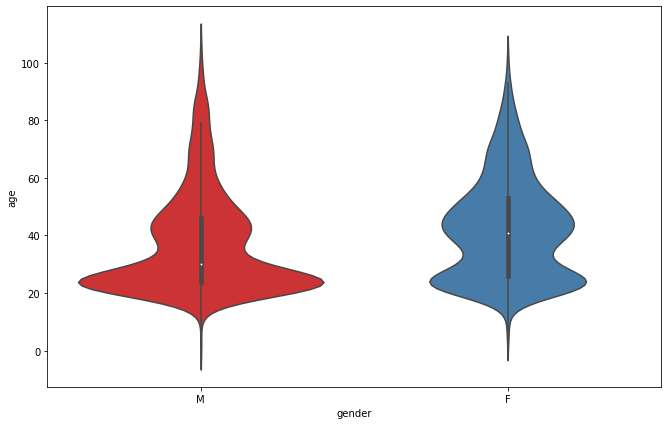

In [27]:
plt.figure(figsize=(11,7))
sns.violinplot(data = New_Active, x='gender',y= 'age', palette='Set1')

<AxesSubplot:xlabel='age', ylabel='gender'>

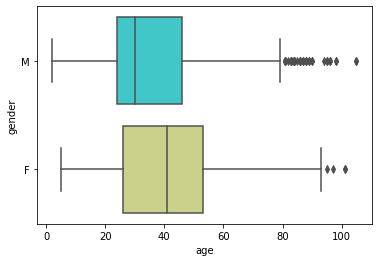

In [28]:
sns.boxplot(x="age", y="gender", data=New_Active,palette='rainbow')

Text(0, 0.5, 'No. of CUstomers')

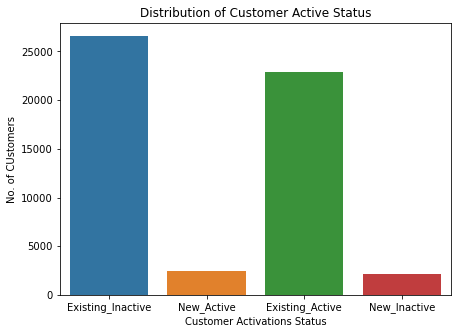

In [58]:
plt.figure(figsize=(7,5))
sns.countplot(x='New_Activations',data=Cust_df)
plt.title('Distribution of Customer Active Status')
plt.xlabel('Customer Activations Status')
plt.ylabel('No. of CUstomers')

In [31]:
pv_Avg_Annual_Income = Cust_df.pivot_table(values='gross_income',index='gender',columns='New_Activations')

In [32]:
pv_Avg_Annual_Income

New_Activations,Existing_Active,Existing_Inactive,New_Active,New_Inactive
gender,,,,
F,141037.457838,130723.432866,126739.154815,138336.033224
M,144146.945284,125682.375611,118970.165297,125013.586914


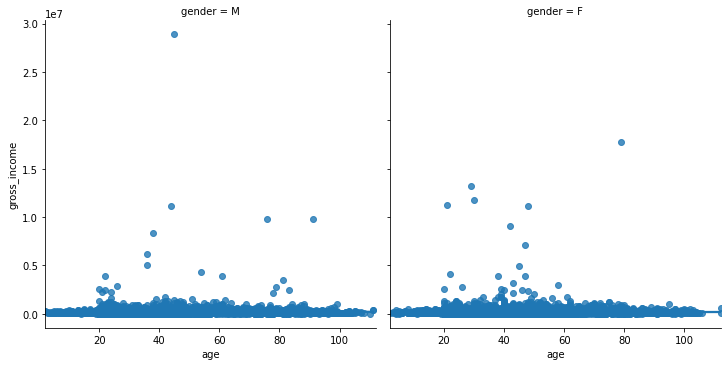

In [33]:
sns.lmplot(x='age',y='gross_income',data=Cust_df,col='gender')

In [34]:
Cust_df.gross_income.mean()

134196.6724036647

C:\Users\91998\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gross_income', ylabel='Density'>

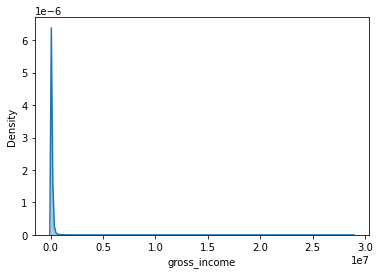

In [35]:
sns.distplot(Cust_df['gross_income'],bins=200)

In [36]:
Cust_df.loc[(Cust_df.gross_income > Cust_df.gross_income.mean()), 'gross_income_1'] = 'gross_income_more_than_avg'
Cust_df.loc[(Cust_df.gross_income < Cust_df.gross_income.mean()), 'gross_income_1'] = 'gross_income_less_than_avg'

<AxesSubplot:xlabel='New_Activations', ylabel='count'>

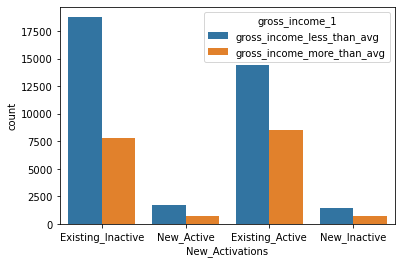

In [37]:
sns.countplot(x='New_Activations',hue = 'gross_income_1', data=Cust_df)

What is the relationship between the number of products owned by customers who
were active at the start and at the end vs those who were active at the start but were

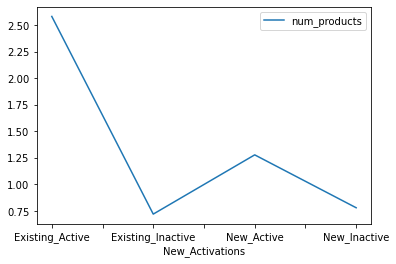

In [62]:
pivot = pd.pivot_table(Cust_df,values = 'num_products',index = 'New_Activations', aggfunc = np.mean).plot()

In [41]:
num_products_summary = Cust_df[['num_products','New_Activations']]

In [42]:
num_products_summary.groupby('New_Activations')['num_products'].mean()

New_Activations
Existing_Active      2.580634
Existing_Inactive    0.719498
New_Active           1.277276
New_Inactive         0.779314
Name: num_products, dtype: float64

In [45]:
num_products_summary.describe()

,num_products
count,54030.000000
mean,1.536017
std,1.578848
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,13.000000


C:\Users\91998\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

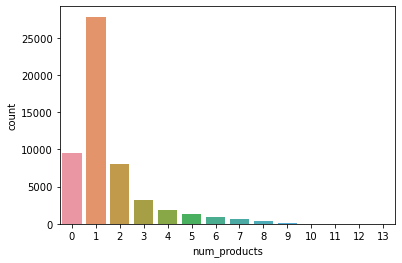

In [46]:
sns.countplot(Cust_df['num_products']).unique()

In [ ]:
fp = Cust_df.pivot_table(index = 'segment',columns='New_Activations',values = 'num_products')